In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

In [2]:
def uGen(a,b,m,N,seed):
    x = seed
    u = x/m
    res = []
    for _ in range(17):
        x = (a*x + b)%m
        u = x/m
        res.append(u)
    for i in range(17, N):
        u = res[i-17]-res[i-5]
        if(u<0): u+=1
        res.append(u)
    return res

In [26]:
def normGen(u1, u2):
    R = np.sqrt(-2*np.log(u1))
    theta = 2*cmath.pi*u2
    return R*np.cos(theta)

## Q1

In [3]:
def Genner(N):
    pi = [1/2, 1/3, 1/6]
    mu = [-1, 0, 1]
    sigma = [1/4, 1, 1/2]
    intervals = []
    for i in range(len(pi)+1):
        intervals.append(np.sum(pi[0:i]))
    print(intervals)
    u = uGen(1597, 25, 244944, N*2, 8)
    currMu = 0
    currSigma = 0
    res = []
    np.random.seed(210123043)
    for i in range(N):
        for j in range(1, len(intervals)):
            if(u[i]>intervals[j-1] and u[i]<=intervals[j]):
                currMu = mu[j-1]
                currSigma = sigma[j-1]
                break
        curr = np.random.normal(currMu, currSigma)
        res.append(curr)
        
    return res

In [4]:
q1 = Genner(5000)

[0.0, 0.5, 0.8333333333333333, 0.9999999999999999]


In [5]:
print(np.mean(q1))

-0.3198945778941224


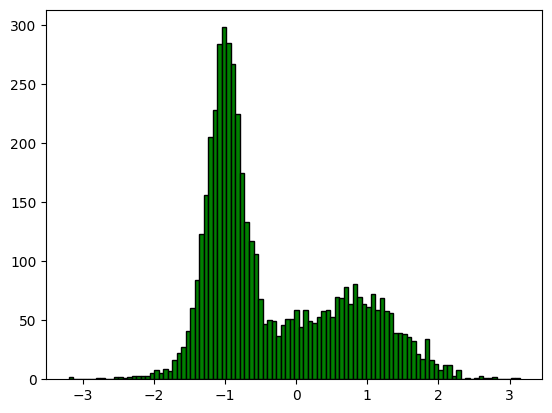

In [6]:
plt.hist(q1, bins=100, edgecolor='black', color='g')
plt.show()

## Q2

In [36]:
def brownianPath(N):
    res = []
    np.random.seed(210123043)
    for k in range(1, 11):
        u = uGen(1597, 25, 244944, N*2, k)
        u_i = 0
        W = list()
        W.append(0)
        for i in range(1, N):
            W.append(W[i-1] + np.sqrt(1/1000)*normGen(u[u_i], u[u_i+1]))
            u_i+=2
        res.append(W)
        
    return res

In [37]:
W = brownianPath(5000)

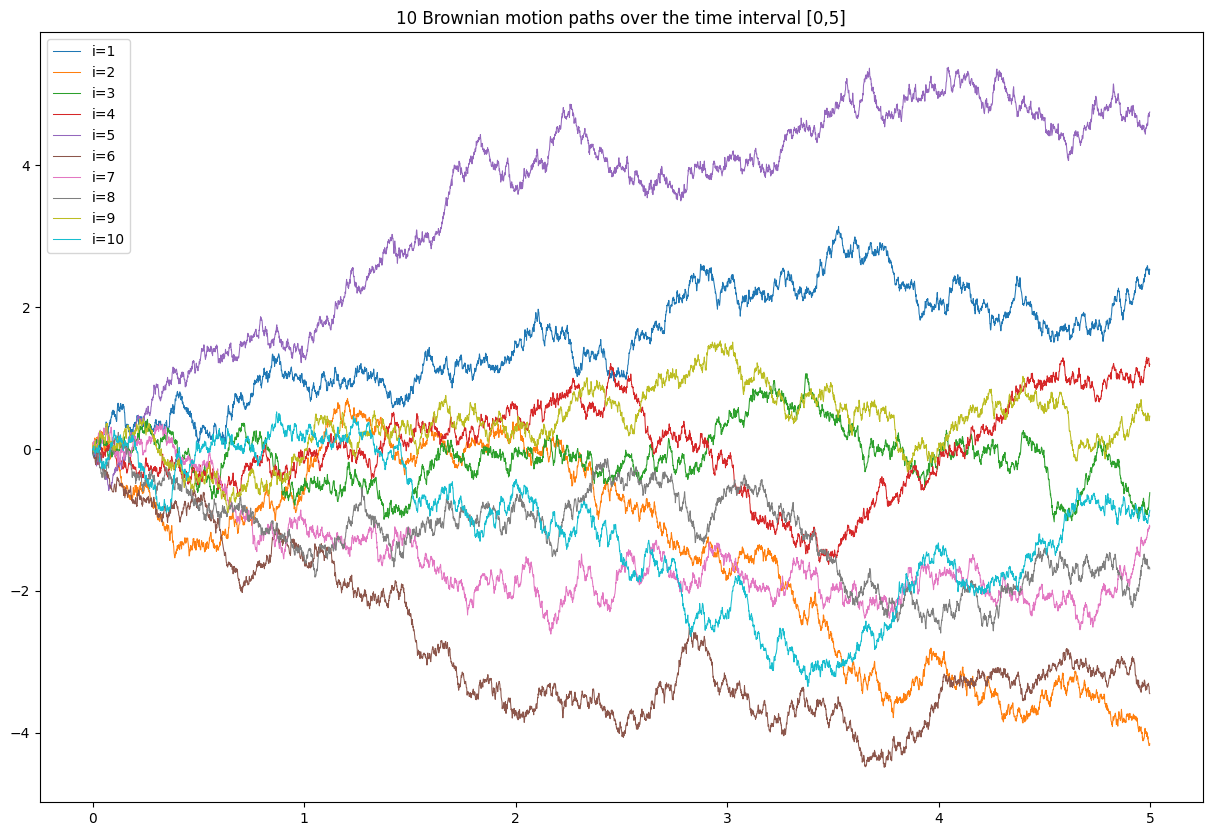

In [38]:
plt.figure(figsize=(15,10))
for i in range(10):
    x = [i*1/1000 for i in range(5000)]
    plt.plot(x, W[i],linewidth = 0.75, label = f"i={i+1}")
    plt.legend()
    
plt.title("10 Brownian motion paths over the time interval [0,5]")
plt.show()

In [40]:
sum1 = 0
for i in range(10):
    sum1+=W[i][1999]

sum2 = 0
for i in range(10):
    sum2+=W[i][-1]
    
print(f"Estimated value of W[2] is {sum1/10} and the estimated value of W[5] is {sum2/10}")

Estimated value of W[2] is -0.028481207740702945 and the estimated value of W[5] is -0.294214874833127


## Q3

In [45]:
def brownianPath2(N, mu, sigma):
    res = []
    np.random.seed(210123043)
    for k in range(1, 11):
        u = uGen(1597, 25, 244944, N*2, k+8)
        u_i = 0
        X = list()
        X.append(5)
        for i in range(1, N):
            X.append(X[i-1] + mu*(1/1000) + sigma*np.sqrt(1/1000)*normGen(u[u_i], u[u_i+1]))
            u_i+=2
        res.append(X)
        
    return res

In [46]:
X = brownianPath2(5000, 0.06, 0.3)

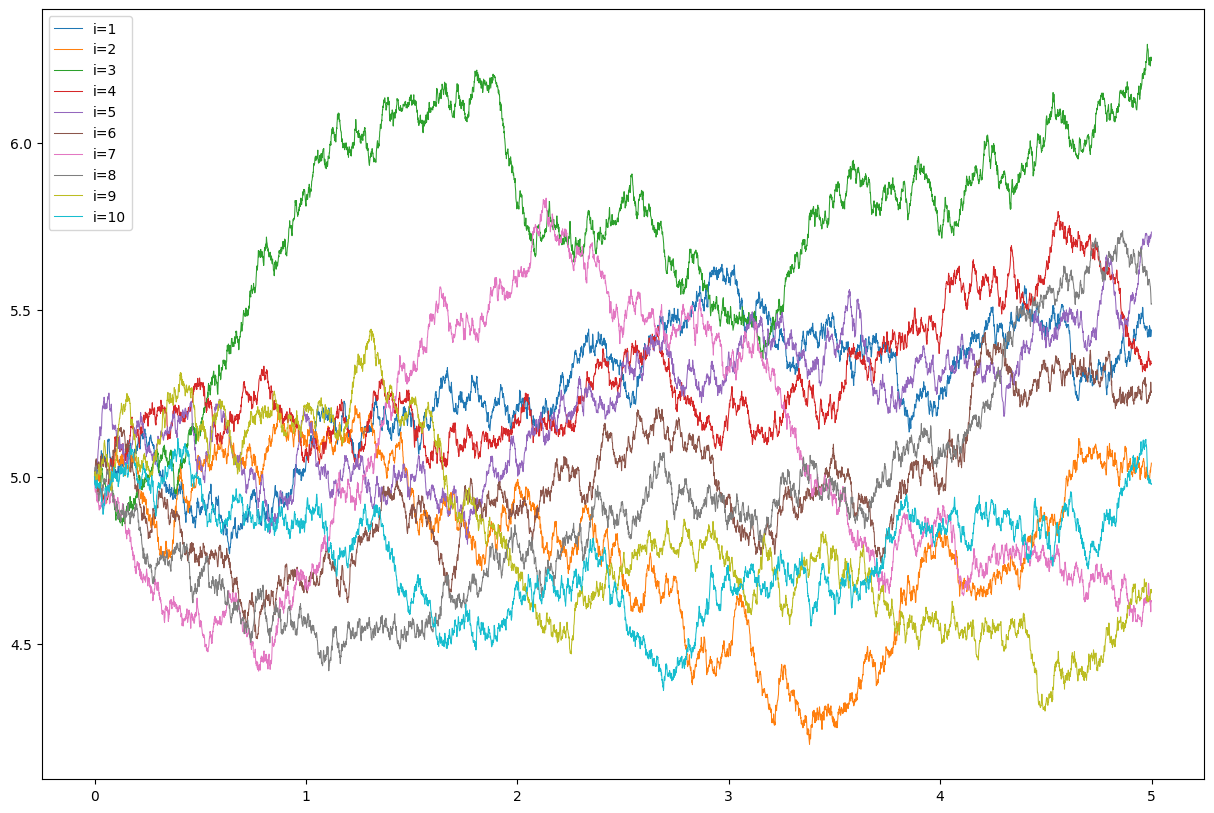

In [47]:
plt.figure(figsize=(15,10))
for i in range(10):
    x = [i*1/1000 for i in range(5000)]
    plt.plot(x, X[i],linewidth = 0.75, label = f"i={i+1}")
    plt.legend()
    
plt.show()

In [48]:
sum21 = 0
for i in range(10):
    sum21+=X[i][1999]

sum22 = 0
for i in range(10):
    sum22+=X[i][-1]
    
print(f"Estimated value of X[2] is {sum21/10} and the estimated value of X[5] is {sum22/10}")

Estimated value of X[2] is 5.0871362359158265 and the estimated value of X[5] is 5.2833257257999335
